# SPAM DETECTION

1. Read Dataset and make it in proper format
2. Encode Labels
3. Convert all cases to lower
4. Remove Punctuation
5. Remove StopWOrds
6. Check Stats of Message
7. Convert all texts into vectors
8. Import Classifier
9. Train and test
10. Check for accuracy/confusion Matrix

In [2]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
sms=pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# ham - good message 
#spam - bad message


# dropping extra 
sms.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [11]:
# lables
sms.rename(columns={'v1':"labels",'v2':'message'},inplace=True)

In [12]:
sms.head(5)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Shape
print("SHAPE :",sms.shape)

SHAPE : (5572, 2)


In [17]:
# Count
print("Ham and Spam Count :\n",sms.labels.value_counts())

Ham and Spam Count :
 ham     4825
spam     747
Name: labels, dtype: int64


In [22]:
len(sms[sms['labels']=='ham'])

4825

In [24]:
# Ratio
print("Spam Ration= ",round(len(sms[sms['labels']=='spam'])/len(sms.labels),2)*100,"%")
print("HAM RATION= ",round(len(sms[sms['labels']=='ham'])/len(sms.labels),2)*100,"%")

Spam Ration=  13.0 %
HAM RATION=  87.0 %


In [30]:
# New column for length of message
sms['length']=sms.message.str.len()

In [29]:
sms.message.str.len()

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

In [35]:
sms.head(5)

,labels,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# Label Coding 0 and 1
sms['labels'].replace({'ham':0,'spam':1},inplace=True)

In [36]:
# convert all messages to lower case
sms['message']=sms['message'].str.lower()

In [37]:
sms.head(4)

,labels,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49


In [38]:
sm=sms.copy()

### Regular Expression

In [40]:
# replace email addresses with email
sms['message']=sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# replace URL's with webaddress'
sms['message']=sms['message'].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*-)?$','webaddress')

# replace money symbol with 'moneysymb' ($,£ (can be typed using ALt+156))
sms['message']=sms['message'].str.replace(r'E|\$',"dollers")

# replace 10 digits phone number (format includes paranthesis,space,no space,dashes) with 'phone number'
sms['message']=sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# replace number with 'numbr'
sms['message']=sms['message'].str.replace(r'\d+(\.\d+)?','numbr')

In [41]:
# Remove Punctuation
sms['message']=sms['message'].str.replace(r'[^\w\d\s]',' ')

# replace whitespace betweeb terms with a single space
sms['message']=sms['message'].str.replace(r'\s+',' ')

# remove leading and trailing white space
sms['message']=sms['message'].str.replace(r'^\s+|\s+?$',' ')


In [42]:
sms.head()

,labels,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


**REMOVE STOP WORDS**
----------------------

In [45]:
# import important library
import string
import nltk
from nltk.corpus import stopwords

In [47]:
stop_words=set(stopwords.words("english")+['u','u','ur','4','2','im',"don't",'doin','ure'])

sms['message']=sms['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [48]:
sms['clean_length']=sms.message.str.len()
sms

,labels,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38
...,...,...,...,...
5567,1,numbrnd time tried numbr contact å numbr pound...,161,124
5568,0,ì_ b going esplanade fr home,37,28
5569,0,pity mood suggestions,57,21
5570,0,guy bitching acted like interested buying some...,125,79


In [49]:
# Total Removal

print("Original Length",sms.length.sum())
print("clean Length",sms.clean_length.sum())

Original Length 446422
clean Length 299314


# Checking Distribution

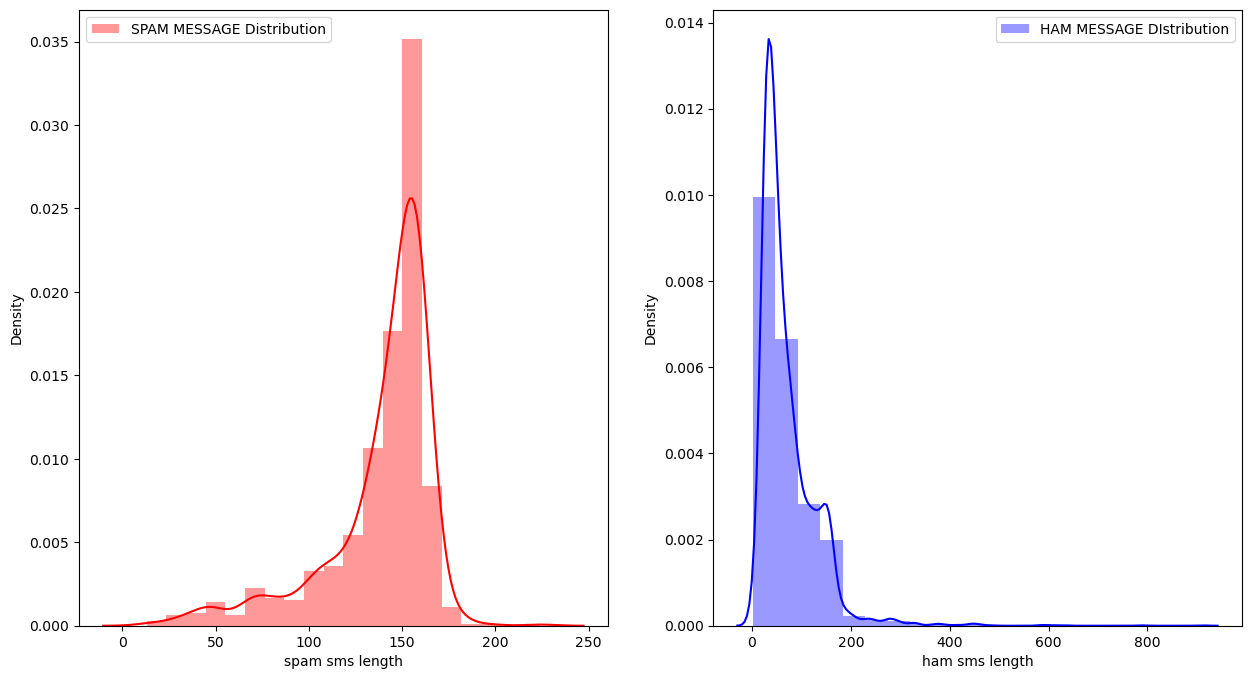

In [54]:
# before cleaning

# SPAM
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['labels']==1]['length'],bins=20,ax=ax[0],label="SPAM MESSAGE Distribution",color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()


# HAM
sns.distplot(sms[sms['labels']==0]['length'],bins=20,ax=ax[1],label="HAM MESSAGE DIstribution",color='b')
ax[1].set_xlabel("ham sms length")
ax[1].legend()

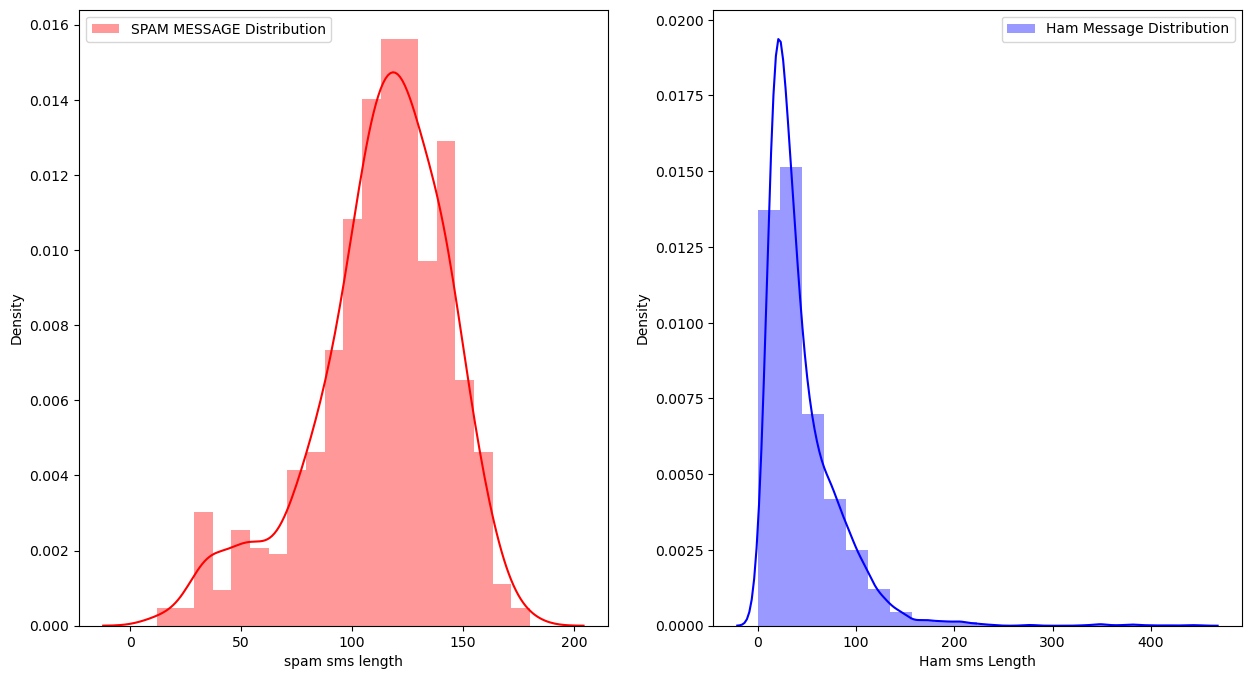

In [66]:
# clean length
# spam
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['labels']==1]['clean_length'],bins=20,ax=ax[0],label="SPAM MESSAGE Distribution",color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

# ham
sns.distplot(sms[sms['labels']==0]['clean_length'],bins=20,ax=ax[1],label="Ham Message Distribution",color='b')
ax[1].set_xlabel("Ham sms Length")
ax[1].legend()

plt.show()

In [73]:
# install word cloud
#!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


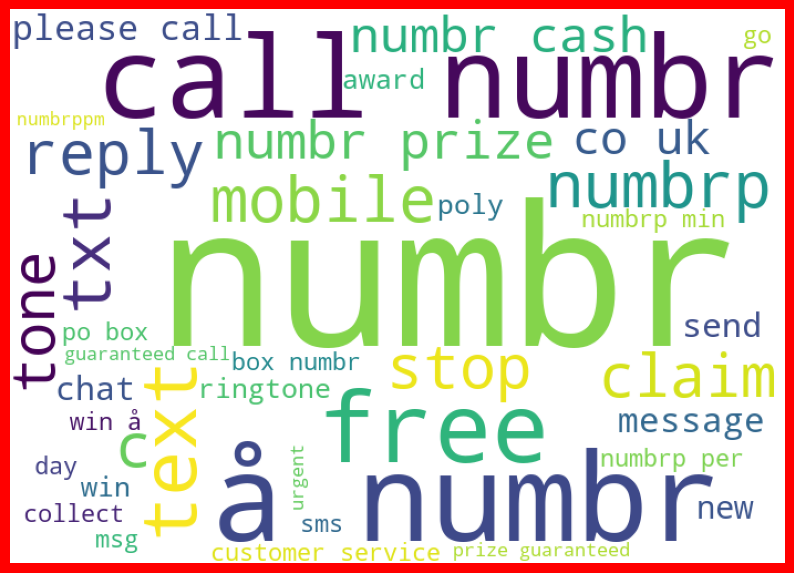

In [78]:
## Getting Sense of LOud Words in SPAM

from wordcloud import WordCloud

spam=sms['message'][sms['labels']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spam))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=100)
plt.show()

**We can clearly see, some of the words like "free,claim,cash" etc are indication of spam**

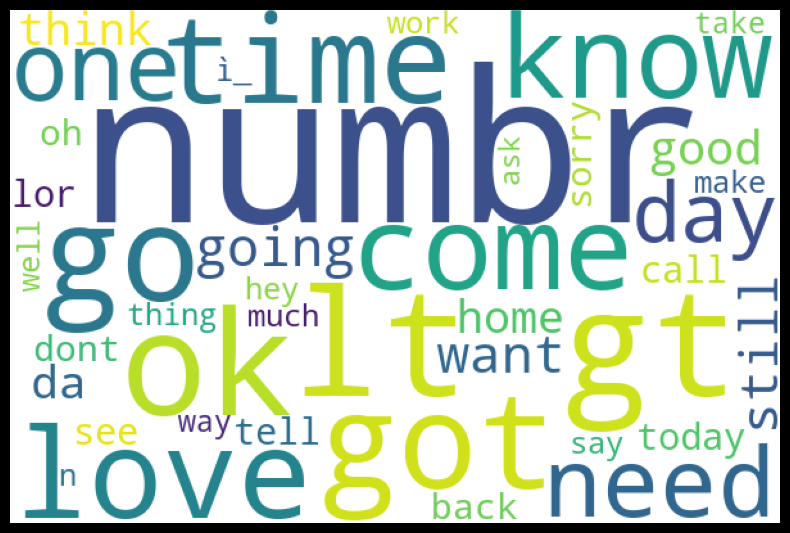

In [85]:
# Getting Sense of Loud Words in HAM
hams=sms['message'][sms['labels']==0]
spam_cloud=WordCloud(width=600,height=400,background_color='white',max_words=40
                    ).generate(' '.join(hams))

plt.figure(figsize=(8,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [86]:
#  Convert text into vectors using TF_IDF Vectorizer
# INstantiate Multinomial NB CLassifier
# Split features and labels

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [88]:
tf_idf=TfidfVectorizer()
naive=MultinomialNB()
features=tf_idf.fit_transform(sms['message'])

x=features
y=sms['labels']

In [97]:
# TRain Test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)

In [98]:
print("FInal Score= ",accuracy_score(y_test,y_pred))

FInal Score=  0.968413496051687


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.77      0.87       191

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [100]:
con_mat=confusion_matrix(y_test,y_pred)

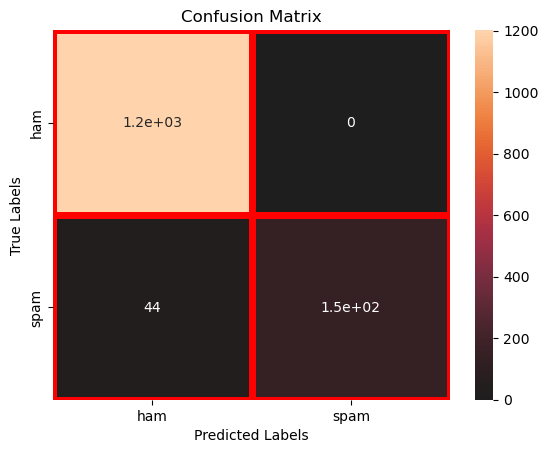

In [109]:
ax=plt.subplot()
sns.heatmap(con_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)
ax.set_xlabel("Predicted Labels");
ax.set_ylabel("True Labels")

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()


In [111]:
con_mat

array([[1202,    0],
       [  44,  147]], dtype=int64)